## 阿里云SDK基本示例  
TODO:
- 请在这里补充阿里云的相关文档链接。
    mqtt_quick_start出处： https://help.aliyun.com/document_detail/261162.html
- 写简单文档说明这里代码的功能。
- 此篇文章现在还有些问题，是根据apps的mqtt改造的，但是只有连接功能能用，具体需要做的是将quick start也写成notebook形式，并将注释写到notebook里面。在notebook上开发各平台的API demo，好处是能添加注释以及在文档中保留代码运行结果
或者根据quick start改一改这个notebook 做到让自己和老师看懂

### 阿里云基本MQTT Demo

In [1]:
import paho.mqtt.client as mqtt


MQTTHOST = "iot-06z009y9rnab11u.mqtt.iothub.aliyuncs.com"
MQTTPORT = 1883
mqttClient = mqtt.Client(client_id="i6faViFVrIm.light1|securemode=2,signmethod=hmacsha256,timestamp=1676383979937|")
mqttClient.username_pw_set(username="light1&i6faViFVrIm", password="f0d428467f9fb06467c52f24d11a50491f81c8b4f51684a92682d821ddde29c9")

print(mqttClient)

其设备Identifier是：
- device id，字符串i6faViFVrIm.light1，使用hmacsha256签名。timestamp什么用？
- username
- password

https://help.aliyun.com/document_detail/292635.html
这篇文章提到了如何计算MQTT签名，因为直接使用物联网页面获取设备信息时每次获取到的password不相同，**timestamp是hmacsha256的一个输入用于产生password**。


<br><br>
<font color=red>
    client id和username的作用？为什么需要两个？不能用client id做user name？
</font>
<br>

相关资料：
There  are three  required  fields  in  the CONNECT control  packet  for authentication:ClientId,Username, and Password. The ClientId is the unique identification of each client, which the broker uses to authorize the subscriber and publisher.And  the  pair  of Username and Password can  be  used  by the broker for both authentication and authorization.（Trampoline Over the Air: Breaking in IoT Devices Through MQTT Brokers）

The MQTT protocol requires the broker to disconnect the online  client  on  observing  a  new  client with  the  same ClientId. （Burglars’ IoT Paradise: Understanding and Mitigating Security Risks of General Messaging Protocols on IoT Clouds ）

为什么需要两个？

从上述资料来看clientid被broker用于授权subscriber和publisher，起码起到了将S与P分开的效果，<font color=red>但是深层次的设计目的没有了解到。</font>
我的理解是因为上面提到的MQTT协议的设计缺陷，ClientId可能需要进行一些处理变得比较复杂，而且有时username可能是公开信息，所以需要两个来提供更高的安全性。

不能用作client id做username？
我的理解为以下几点：
- 1.username方便记忆/输入
- 2.username可能是一个公开信息
- 3.clientId被用于区分subscriber和publisher

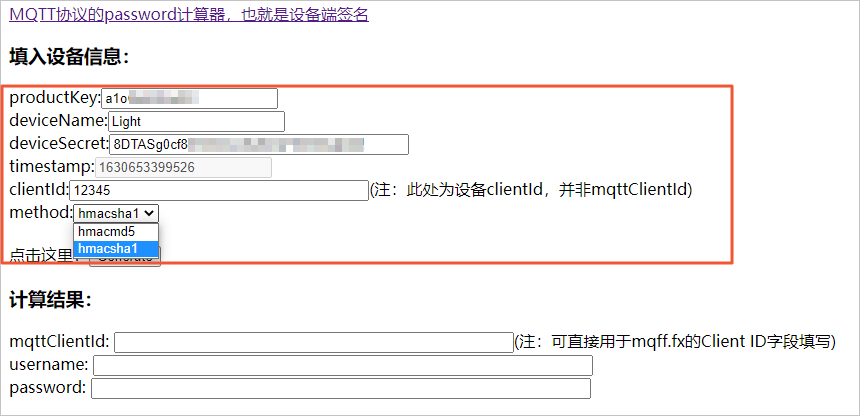

### 阿里云Linkkit
https://help.aliyun.com/document_detail/98291.html

此处代码还不完整下次提交中补全注释和功能

In [2]:
# 连接MQTT服务器
def on_mqtt_connect():
    mqttClient.connect(MQTTHOST, MQTTPORT, 60)
    mqttClient.loop_start()


# publish 消息
def on_publish(topic, payload, qos):
    mqttClient.publish(topic, payload, qos)


# 消息处理函数
def on_message_come(lient, userdata, msg):
    print(msg.topic + " " + ":" + str(msg.payload))


# subscribe 消息
def on_subscribe():
    # 订阅监听自定义Topic
    mqttClient.subscribe("light1/user/update1", 1)
    mqttClient.on_message = on_message_come # 消息到来处理函数

def main():
    print("start note book")
    on_mqtt_connect()
    # 自定义Topic消息上行
    on_publish("light1/user/test2", "Hello Python!", 1)
    # 系统属性Topic消息上行
    on_publish("/sys/light1/thing/event/property/post", "{\"method\":\"thing.service.property.set\",\"id\":\"i6faViFVrIm.light1|securemode=2,signmethod=hmacsha256,timestamp=1676381859164|\",\"params\":{\"Status\":1},\"version\":\"1.0.0\"}", 1)
    on_subscribe()

In [3]:
main()

start note book
